In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sign_mnist_train.csv')
tst = pd.read_csv('sign_mnist_test.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


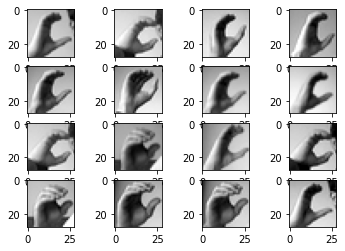

In [4]:
# The first column is the label
indexes = df[df['label'] == 2].index[0:16]
photos = []

for i in indexes:
    data = df.iloc[i]
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    photos.append(pixels)




fig = plt.figure()

for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(photos[i], cmap='gray')



In [5]:
X_train = df.drop('label', axis=1)
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = tst.drop('label', axis=1)
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

0.4326547685443391
[0.82175227 0.63194444 0.78709677 0.61632653 0.6064257  0.42105263
 0.49712644 0.53669725 0.13194444 0.3897281  0.44019139 0.25888325
 0.24054983 0.41869919 0.2074928  0.49390244 0.15972222 0.34552846
 0.47983871 0.30075188 0.26589595 0.39805825 0.3258427  0.28614458]


In [6]:
#skimage resize with interpolation

0.6143335192414947
[0.84592145 0.89583333 0.82903226 0.5877551  0.82931727 0.66801619
 0.56321839 0.58027523 0.6875     0.46223565 0.99521531 0.60152284
 0.17525773 0.75203252 0.32564841 0.74390244 0.39583333 0.52845528
 0.57258065 0.39097744 0.43930636 0.52427184 0.68539326 0.5060241 ]


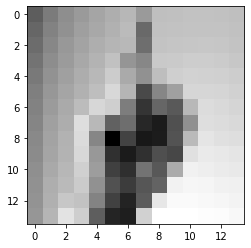

In [14]:
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = resize(pixels,(dim1,dim2), anti_aliasing=False)
    return np.append(test_resized.flatten(), label)


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

pixels = new_df.drop(196, axis=1).iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

X_train = new_df.drop(196, axis=1)
y_train = new_df[196]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = new_test.drop(196, axis=1)
y_test = new_test[196]

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

In [8]:
# cutting top and bottom additionally
ndf = new_df.iloc[:, list(range(14*1, 14*12))] # cutting off top and bottom of picture
ndf['label'] = df['label']

tdf = new_test.iloc[:, list(range(14*1, 14*12))] # cutting off top and bottom of picture
tdf['label'] = tst['label']

X_train = ndf.drop('label', axis=1)
y_train = ndf['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = tdf.drop('label', axis=1)
y_test = tdf['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

C:\Users\mariusarlauskas\AppData\Local\Temp\ipykernel_2952\2270350709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['label'] = df['label']
C:\Users\mariusarlauskas\AppData\Local\Temp\ipykernel_2952\2270350709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['label'] = tst['label']


0.6129392080312326
[0.90030211 0.85416667 0.77741935 0.66530612 0.85943775 0.49392713
 0.47988506 0.64678899 0.54861111 0.48338369 0.99521531 0.50507614
 0.21649485 0.67479675 0.60806916 0.67682927 0.36805556 0.55284553
 0.58870968 0.4962406  0.45375723 0.57281553 0.52808989 0.50301205]


In [ ]:
#taking every second pixel

0.5779419966536531
[0.86102719 0.71759259 0.86451613 0.65306122 0.69879518 0.4534413
 0.60344828 0.6353211  0.44444444 0.41087613 0.81818182 0.65736041
 0.20274914 0.58130081 0.57925072 0.74390244 0.47222222 0.44308943
 0.64516129 0.37969925 0.34682081 0.36893204 0.58801498 0.49698795]


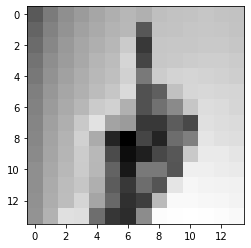

In [11]:
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = pixels[::2, ::2]
    return test_resized.flatten()


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

X_train = new_df
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = new_test
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))    


pixels = new_df.iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')

In [12]:
# downsizing with interpolation + antialiasing

0.6214445064138315
[0.8489426  0.90046296 0.8483871  0.6122449  0.85341365 0.63967611
 0.57758621 0.5733945  0.6875     0.45619335 0.99521531 0.60406091
 0.18556701 0.75203252 0.36887608 0.74390244 0.38194444 0.5203252
 0.58467742 0.40225564 0.48554913 0.5        0.68164794 0.5060241 ]


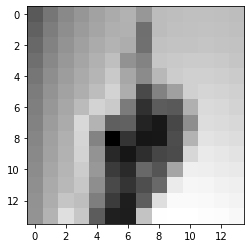

In [13]:
import numpy as np
from skimage.transform import resize

def downsize(data):
    label = data[0]

    # The rest of columns are pixels
    pixels = data[1:]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    
    dim1, dim2 = 14, 14
    test_resized = resize(pixels,(dim1,dim2), anti_aliasing=True)
    return test_resized.flatten()


new_rows = []
for index, row in df.iterrows():
    new_rows.append(downsize(row))
    
new_test_rows = []
for index, row in tst.iterrows():
    new_test_rows.append(downsize(row))
    
new_df = pd.DataFrame(new_rows)
new_test = pd.DataFrame(new_test_rows)

X_train = new_df
y_train = df['label']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

X_test = new_test
y_test = tst['label']

y_pred = clf.predict(X_test)

a = pd.crosstab(y_test, y_pred).to_numpy()
overall_accuracy = a.diagonal().sum()/a.sum()
print(overall_accuracy)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))    


pixels = new_df.iloc[0]
pixels = np.array(pixels)
pixels = pixels.reshape((14, 14))

plt.imshow(pixels, cmap='gray')